## Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import data
from sklearn.cluster import KMeans

# Image Compression

In this challenge we will use **images** 🖼️ as data. 

You will use **K-means** for image compression, by reducing the colors in an image to only the most frequent ones.

###  Black & white images

<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">

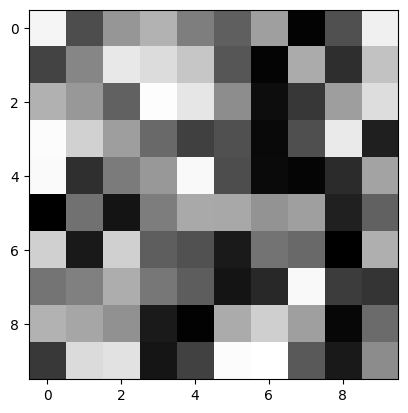

In [2]:
# Let's create  a vector of 100 elements with a value between 0 and 255
image_bw = np.random.uniform(low=0, high=255, size=100)
# Reshape it into a squared matrix, we have an image of 10x10 pixels
image_bw = image_bw.reshape((10, 10))
# Finally display the generated image
plt.imshow(image_bw, cmap='gray');

### Colored images :

<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

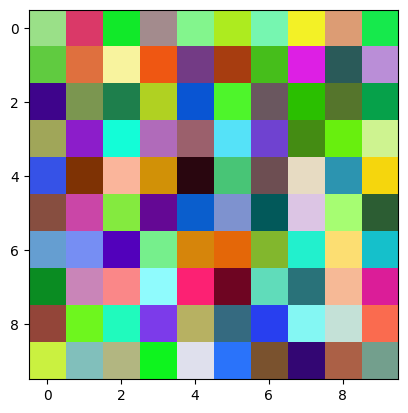

In [3]:
# Let's create vector of 100*3 elements with a value between 0 and 1
image_c = np.random.uniform(low=0., high=1., size=100*3)

# Reshape it into a squared image of 10x10 pixels with 3 colors
image_c = image_c.reshape((10, 10, 3))

# Finally display the generated image
plt.imshow(image_c);

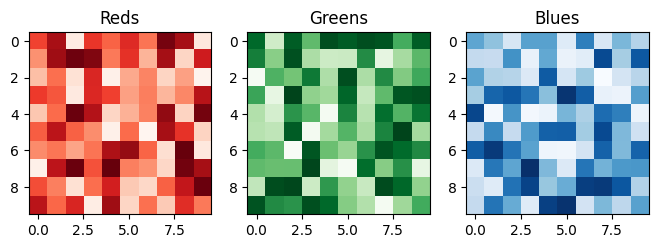

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(8, 6))
colors = {0:'Reds', 1:'Greens', 2:'Blues'}

for i in colors:
    axs[i].imshow(image_c[:, :, i], cmap=colors[i])
    axs[i].set_title(colors[i])

## Images for ML

### Setup

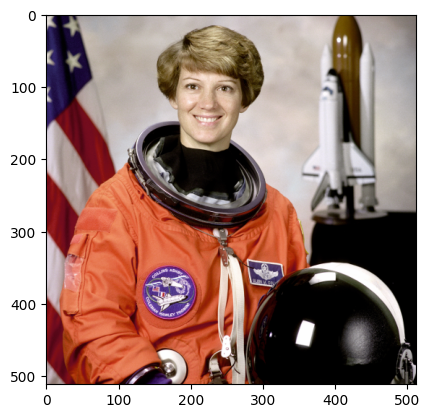

In [5]:
img = data.astronaut()
plt.imshow(img);

❓ What is the shape of this image?  
Assign it to `img_shape`

In [6]:
img_shape = img.shape
img_shape

(512, 512, 3)

### Number of colors

❓ Reshape the image:  
- From its current size of `width * height * 3`
- To a matrix  of size `N * 3` where `N = width * height`  

Assign the reshaped image to `X`.

In [7]:
X = img.reshape((img_shape[0] * img_shape[1]) ,3)
X

array([[154, 147, 151],
       [109, 103, 124],
       [ 63,  58, 102],
       ...,
       [  0,   0,   0],
       [  1,   1,   1],
       [  0,   0,   0]], dtype=uint8)

In [8]:
color_count = len(np.unique(X, axis=0))
color_count

113382

## Compression with K-means

❓ Fit a K-means with `n_clusters=32` on your ML-ready image `X`, and assign it to `kmeans`

In [9]:
k_model = KMeans(n_clusters=32, n_init=10)
kmeans = k_model.fit(X)
kmeans

KMeans(n_clusters=32, n_init=10)

👉 Check the `labels_` of your `kmeans`, then check their `shape` and `number of unique values`

In [10]:
shape = kmeans.labels_.shape
shape

(262144,)

In [11]:
unique_values = len(np.unique(kmeans.labels_))
unique_values

32

In [12]:
kmeans.cluster_centers_

array([[190.38714627, 181.19019207, 177.13279918],
       [ 57.73994156,  50.13104068,  45.25398966],
       [217.62230732,  99.00789852,  64.15453965],
       [110.71596154, 102.12096154, 100.81269231],
       [122.99455556,  16.53977778,  22.97766667],
       [  1.05470385,   0.53393156,   0.55397133],
       [225.36458654, 192.9892407 , 170.10236705],
       [159.13403357, 148.9553602 , 147.13734445],
       [183.17820039,  66.05740447,  24.89100194],
       [251.77654172, 248.83579202, 248.40991536],
       [ 50.44243268,  35.5909935 ,  91.70009285],
       [218.46737419, 208.9793574 , 207.82716193],
       [176.76419891, 167.36049107, 163.51178075],
       [ 95.68031279,  54.69779209, 139.29070837],
       [125.74649123,  93.35555556,  62.22251462],
       [203.88017721,  84.54955698,  46.81526891],
       [ 91.79406554,   9.69641275,  19.47364925],
       [233.67826412, 133.64683876,  97.28395062],
       [134.92363155, 125.69202472, 125.45659211],
       [232.9012365 , 226.49100

❓ Check the `cluster_centers_` of your `KMeans`, shape and first element

In [13]:
kmeans.cluster_centers_.shape

(32, 3)

☝️Each cluster_center is a vector of RGB values, it represents the mean color of the cluster

❓ Create an array `X_compressed`, which stores for each pixel picture the mean color of its corresponding cluster.

In [14]:
kmeans.labels_

array([ 7,  3, 10, ...,  5,  5,  5])

In [15]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed

array([[159.13403357, 148.9553602 , 147.13734445],
       [110.71596154, 102.12096154, 100.81269231],
       [ 50.44243268,  35.5909935 ,  91.70009285],
       ...,
       [  1.05470385,   0.53393156,   0.55397133],
       [  1.05470385,   0.53393156,   0.55397133],
       [  1.05470385,   0.53393156,   0.55397133]])

RGB values must be integer.  

Our colors in `X_compressed` are in `float64`.  

❓ Convert `X_compressed` to `uint8`, the unsigned 8-bits integer type which lies between 0 and 255.

In [16]:
X_compressed = X_compressed.astype(dtype="uint8")
X_compressed

array([[159, 148, 147],
       [110, 102, 100],
       [ 50,  35,  91],
       ...,
       [  1,   0,   0],
       [  1,   0,   0],
       [  1,   0,   0]], dtype=uint8)

❓ Verify that the number of unique colors used is indeed 32.

In [17]:
len(np.unique(X_compressed, axis=0))

32

Almost there! 💪

## Plot compressed image

Our `X_compressed` has shape (262144, 3), we can't display it as an image.

❓ Reshape your compressed image and plot it side by side with your original image.  

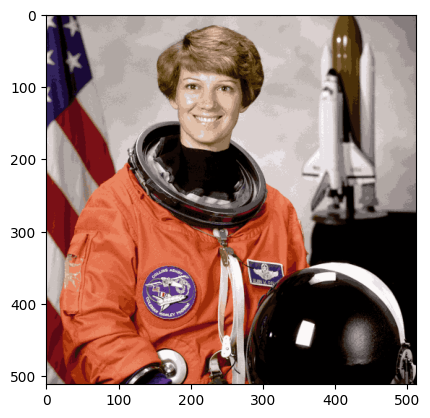

In [18]:
X_compressed2 = X_compressed.reshape((512, 512, 3))
plt.imshow(X_compressed2);

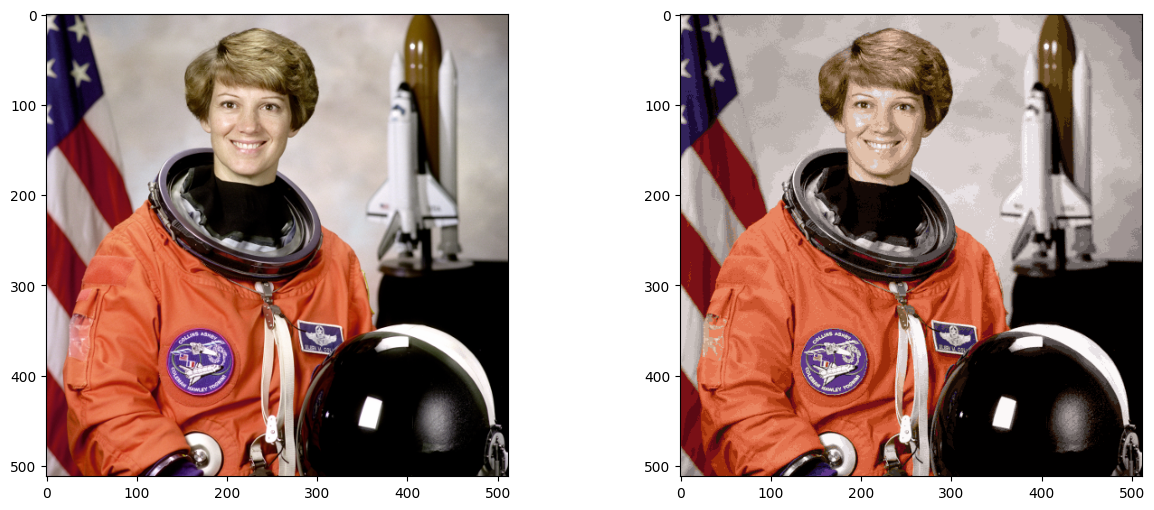

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].imshow(img);
axs[1].imshow(X_compressed.reshape((512, 512, 3)));

## Optional) Use the elbow method

You can try to use the Elbow method to find the optimal compression that loses the least color information.   

Try to plot the `inertia` for `n_clusters` in the list [5, 10, 20, 30, 50, 70, 100] for instance  

⚠️ Long training, you might wait several minutes

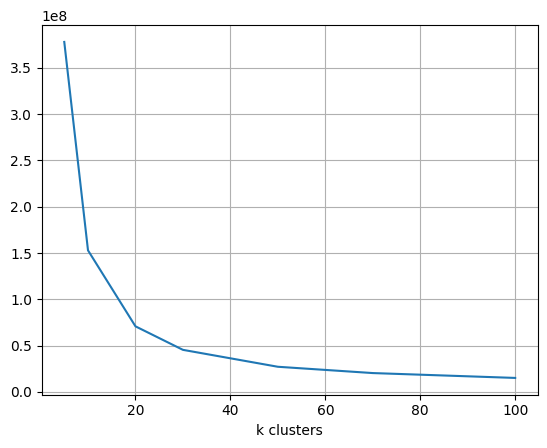

In [20]:
inertias = []
clusters = [5, 10, 20, 30, 50, 70, 100]
for cluster in clusters:
    km_model = KMeans(n_clusters=cluster, n_init=10).fit(X)
    inertias.append(km_model.inertia_)
plt.plot(clusters,inertias)
plt.grid(True)
plt.xlabel("k clusters");

working with 1 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 1 clusters...
The Kmeans inertia is equal to 4891993276.003582


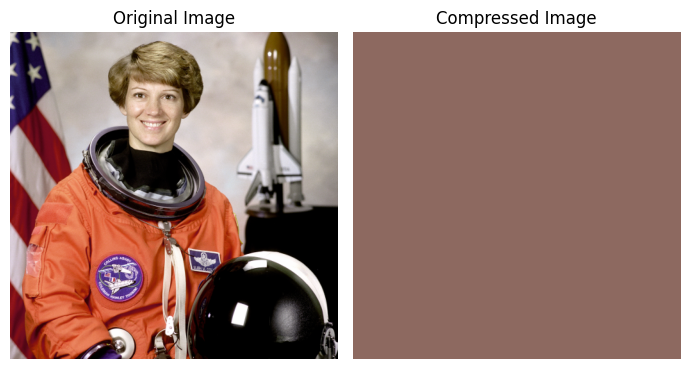

working with 2 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 2 clusters...
The Kmeans inertia is equal to 1509778915.4757533


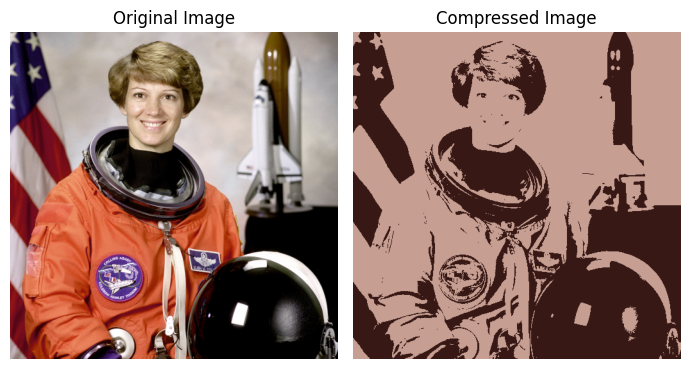

working with 5 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 5 clusters...
The Kmeans inertia is equal to 377749010.9168096


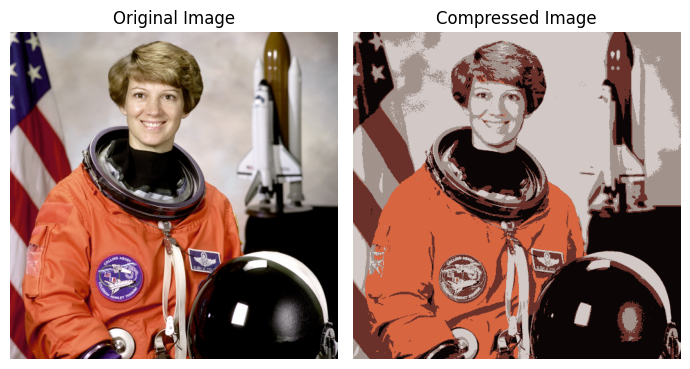

working with 10 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 10 clusters...
The Kmeans inertia is equal to 152963398.83252317


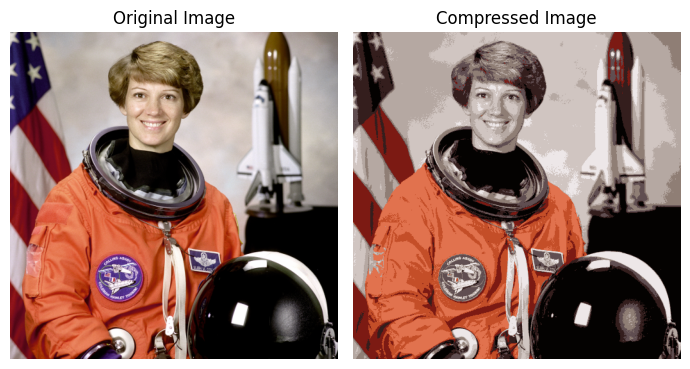

working with 20 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 20 clusters...
The Kmeans inertia is equal to 71171056.71775404


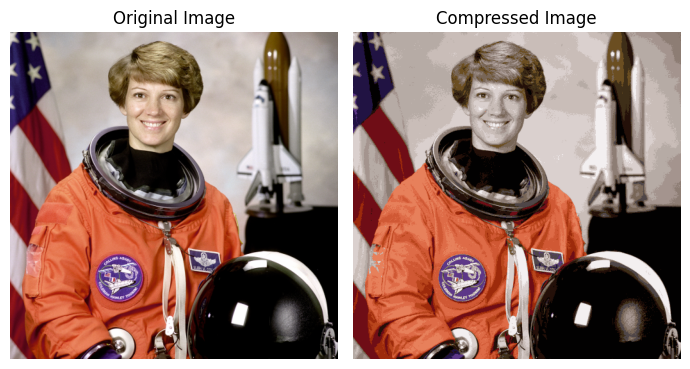

working with 30 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 30 clusters...
The Kmeans inertia is equal to 46071819.28064886


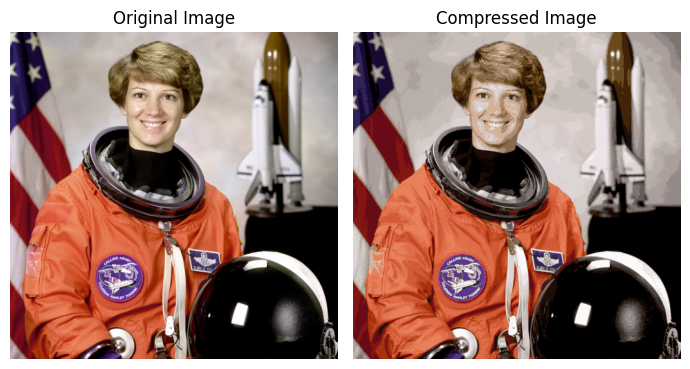

working with 50 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 50 clusters...
The Kmeans inertia is equal to 27445446.981879015


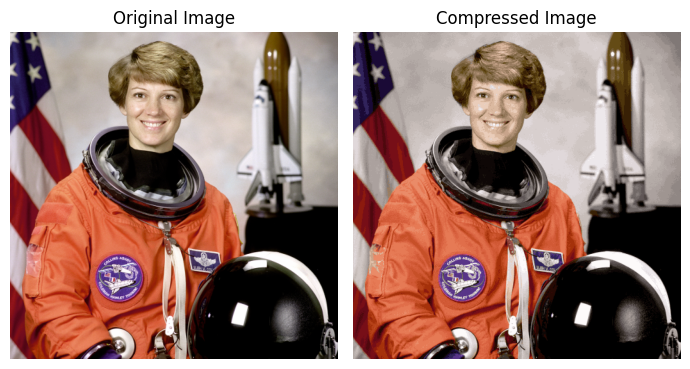

working with 70 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 70 clusters...
The Kmeans inertia is equal to 20495732.023814555


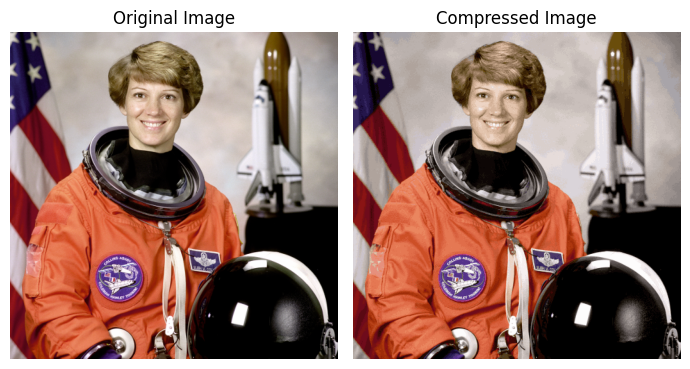

working with 100 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 100 clusters...
The Kmeans inertia is equal to 15292090.880164323


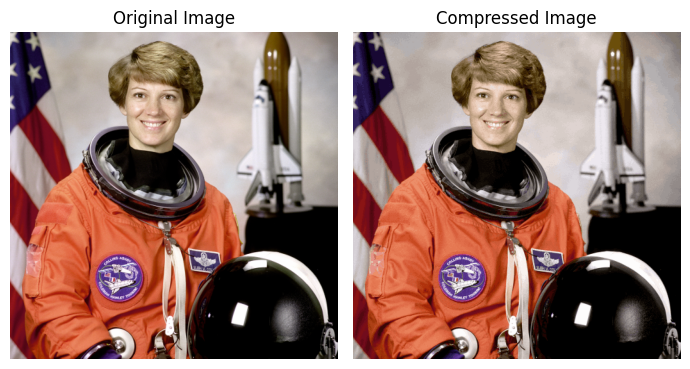

In [21]:
wcss = []
compressed_astronaut = []
for i in [1, 2, 5, 10, 20, 30, 50, 70, 100]:
    print('working with ' + str(i) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = i, max_iter=10, n_init=10)
    kmeans.fit(X)
    # compute inertia
    wcss.append(kmeans.inertia_)
    # compute compressed astronaut
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    X_compressed = centers[labels]
    X_compressed = X_compressed.astype('uint8')
    img_compressed = X_compressed.reshape(img_shape[0], img_shape[1], img_shape[2])
    compressed_astronaut.append(img_compressed)
    # printing
    print("-"*120)
    print(f"If we compress our 113382 unique colors into {i} clusters...")
    print(f"The Kmeans inertia is equal to {kmeans.inertia_}")
    fig, ax = plt.subplots(1, 2, figsize = (7, 7))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[1].imshow(img_compressed)
    ax[1].set_title('Compressed Image')
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()